### 9.
Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int64)

# separate into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [2]:
import time # this will help us on logging the execution time
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
t1 = time.time()
rnd_clf.fit(X_train, y_train)
t2 = time.time()

print("{}: {:.1f} seconds".format(rnd_clf.__class__.__name__, t2 - t1))

RandomForestClassifier: 43.1 seconds


In [3]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9693

In [4]:
# Let's try again, but first reducing the dimensionality with PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [5]:
# timing the training on the reduced dataset

rnd_clf_reduced = RandomForestClassifier()
t1 = time.time()
rnd_clf_reduced.fit(X_reduced, y_train)
t2 = time.time()

print("Reduced Dataset - {}: {:.1f} seconds".format(rnd_clf.__class__.__name__, t2 - t1))

Reduced Dataset - RandomForestClassifier: 103.9 seconds


Yikes, it is taking more than the double of the time (41 seconds vs 101 seconds). PCA was supposed to improve the time, but somehow it is taking longer. As saw in the book, performing PCA does not always traslate in a training time improvement, it will depend on the dataset, model and training algorithm... all combined.

In [6]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_reduced.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9478

At the end, PCA made it worse for us... our model took longer to train and it gave us a worse accuracuy score.

Note: is common to have a drop on accuracy when using PCA, as we will lose some useful signals during the reduction process.

Let's try with another model, instead of Random Forest, and see how it performs:

In [7]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
t1 = time.time()
log_clf.fit(X_train, y_train)
t2 = time.time()

print("{}: {:.1f} seconds".format(log_clf.__class__.__name__, t2 - t1))

LogisticRegression: 18.5 seconds


/Users/bruno/Desktop/hands-on-ML_studies-diary/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

Softmax took longer and performed worse than our previous Random Forest. Let's run the same model, but with the PCA reduced dataset and see how it performs:

In [9]:
log_clf_reduced = LogisticRegression(multi_class="multinomial", solver="lbfgs")
t1 = time.time()
log_clf_reduced.fit(X_reduced, y_train)
t2 = time.time()

print("{}: {:.1f} seconds".format(log_clf_reduced.__class__.__name__, t2 - t1))

LogisticRegression: 5.2 seconds


/Users/bruno/Desktop/hands-on-ML_studies-diary/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
y_pred = log_clf_reduced.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

That was almost 4 times faster! The accuracy dropped a little bit, but that was expected. Depending on the application, this tradeoff is a good thing.

### 10.
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [16]:
# the first 60k instances from this dataset are training data.
# I tried training all of them, but it took tooooooo looong, so I decided to only use 10k random images.

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx].astype(np.int64)

Now let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=2, n_jobs=-1) # reducing it to 2 dimensions and using multiple cores to try to speed this up!
t1 = time.time()
X_reduced = tsne.fit_transform(X)
t2 = time.time()

print("{}: {:.1f} seconds".format(tsne.__class__.__name__, t2 - t1))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.031s...
[t-SNE] Computed neighbors for 10000 samples in 24.662s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 430.766214
[t-SNE] Computed conditional probabilities in 0.613s
[t-SNE] Iteration 50: error = 97.6795197, gradient norm = 0.0005868 (50 iterations in 3.275s)
[t-SNE]

In [13]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

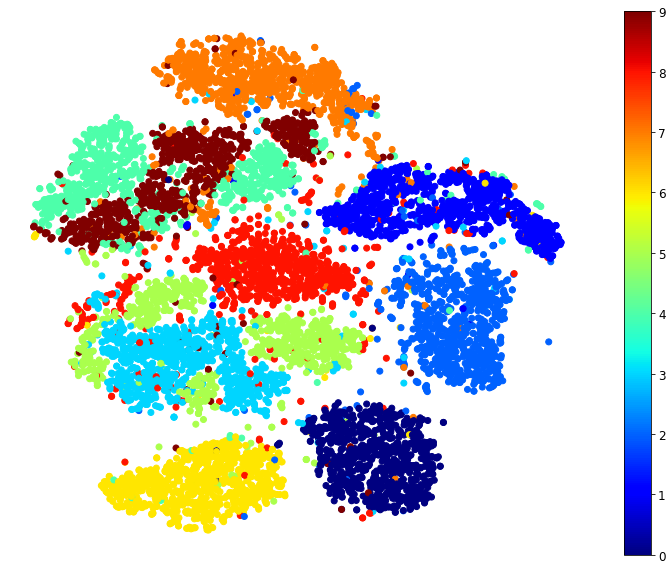

In [24]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Let's focus on digits 3 and 5, which seem to overlap a lot.

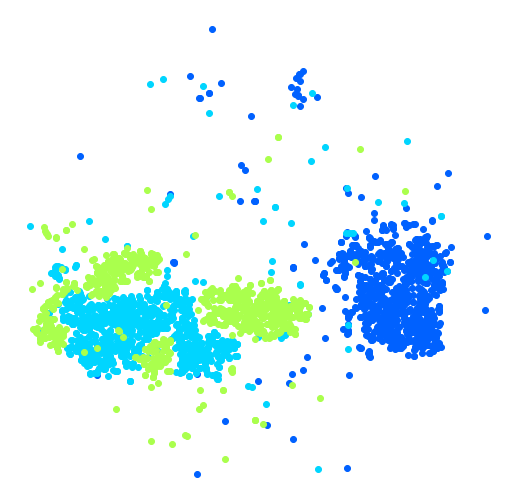

In [28]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Let's see if we can produce a nicer image by running t-SNE on these 3 digits:

In [29]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

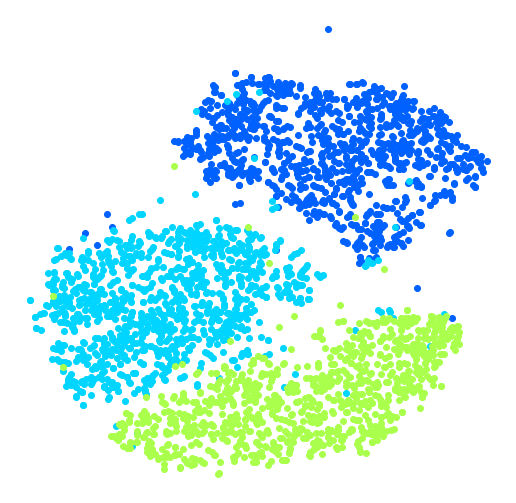

In [30]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Much better, now the clusters have far less overlap. But some 3s are all over the place. Plus, there are two distinct clusters of 2s, and also two distinct clusters of 5s. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case. Let's do that now.

Exercise: Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits.

Let's create a plot_digits() function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples (plot_lle_digits, based on a different digit dataset).

In [31]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

Let's try it! First let's just write colored digits:

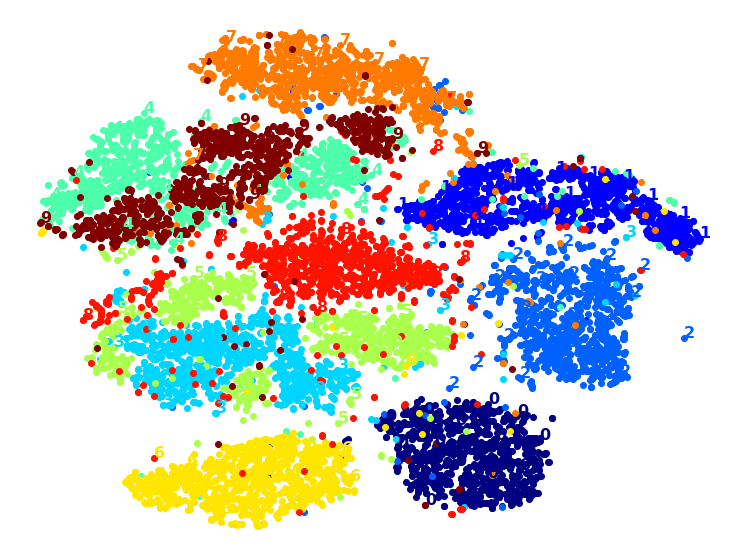

In [32]:
plot_digits(X_reduced, y)

Well that's okay, but not that beautiful. Let's try with the digit images:

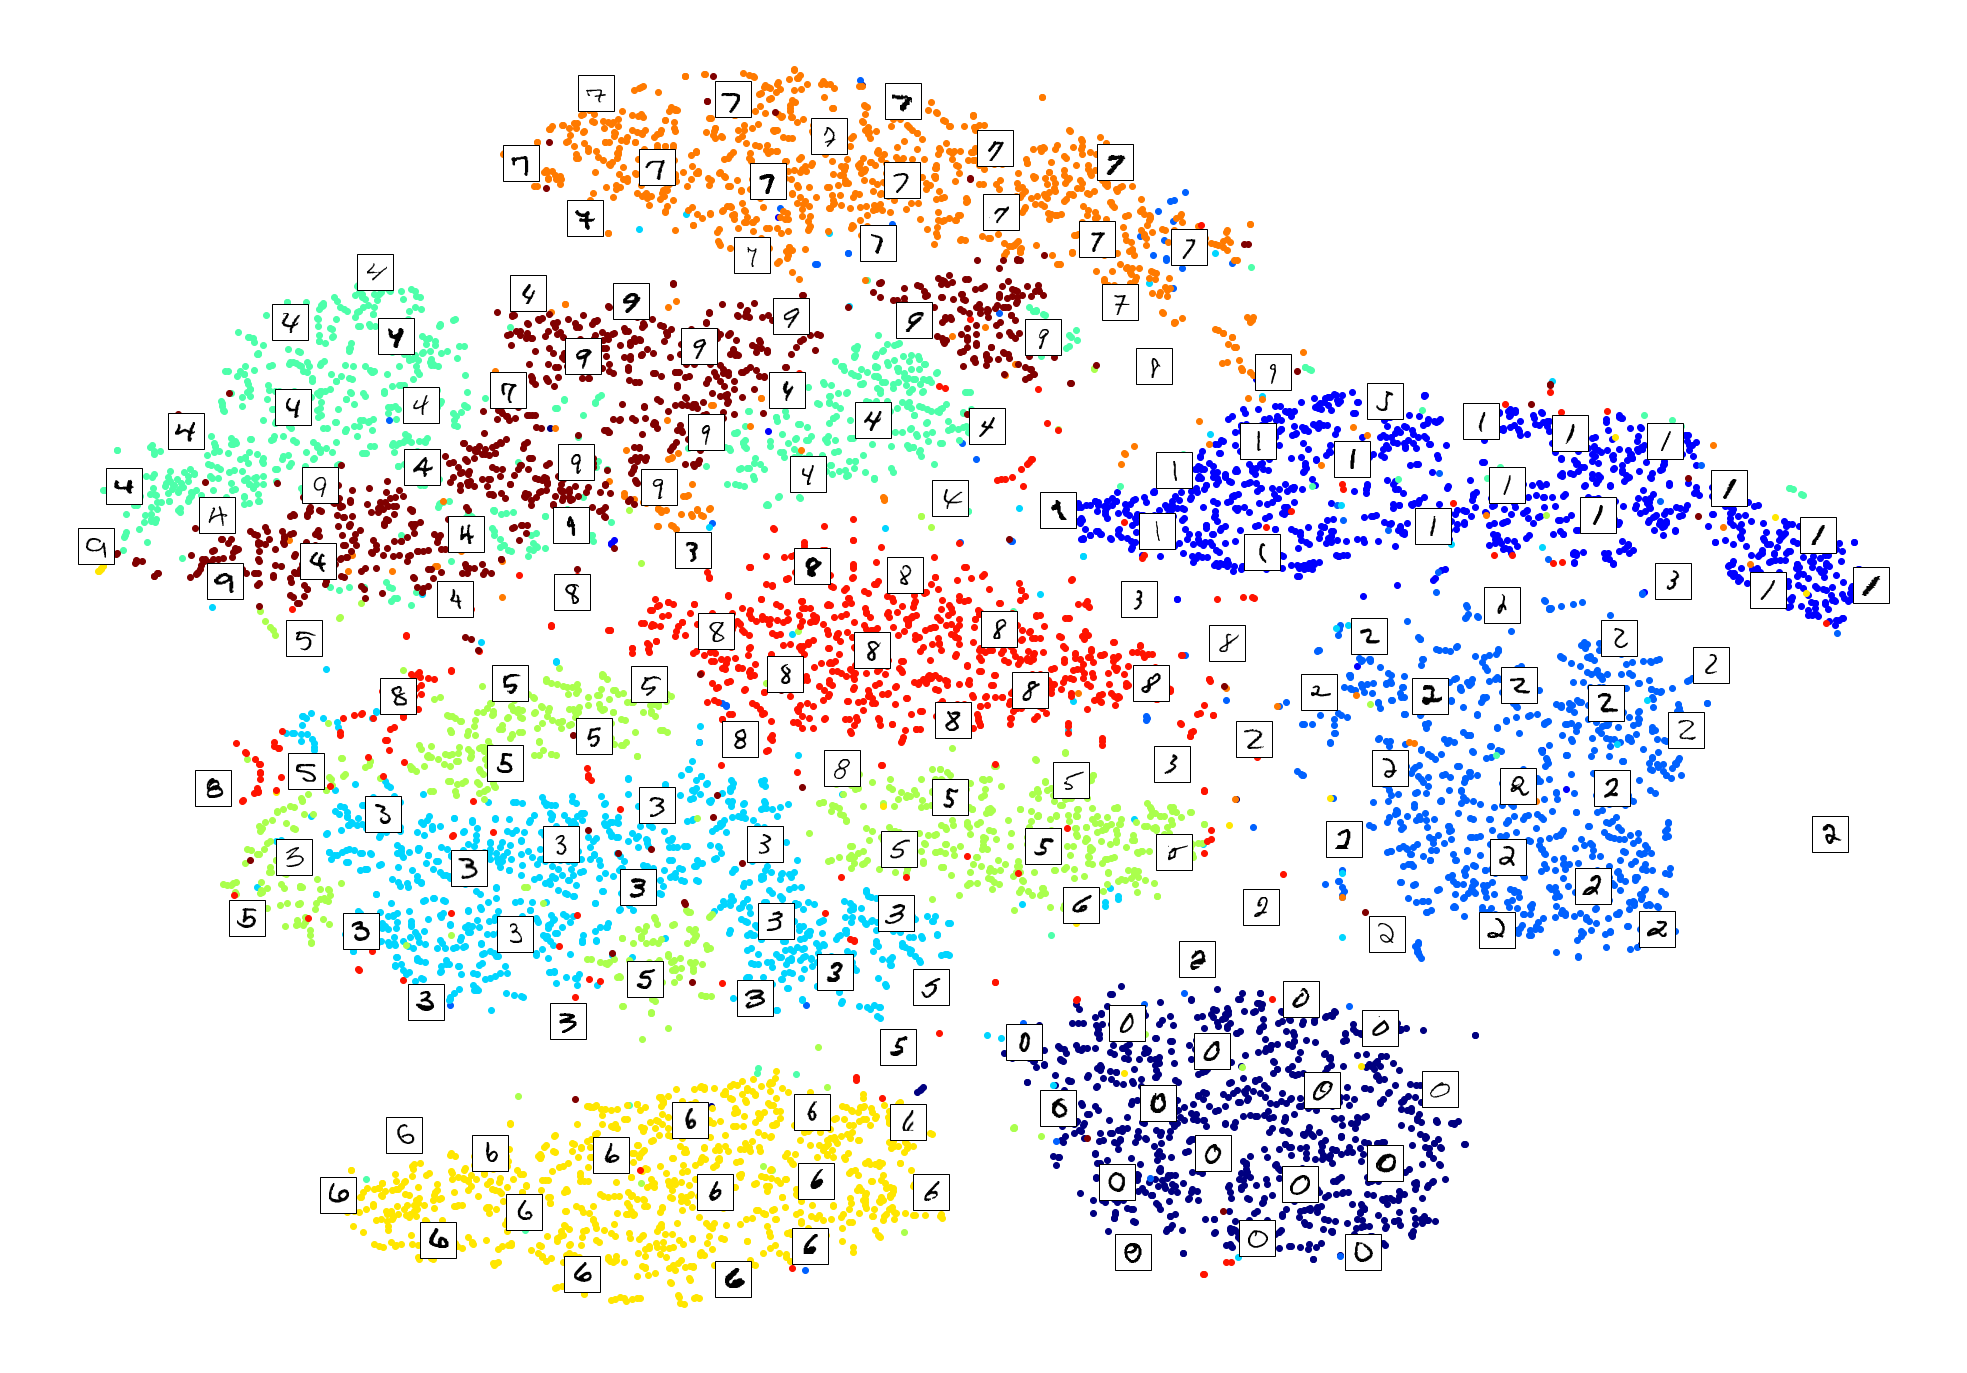

In [34]:
plot_digits(X_reduced, y, images=X, figsize=(35,25))

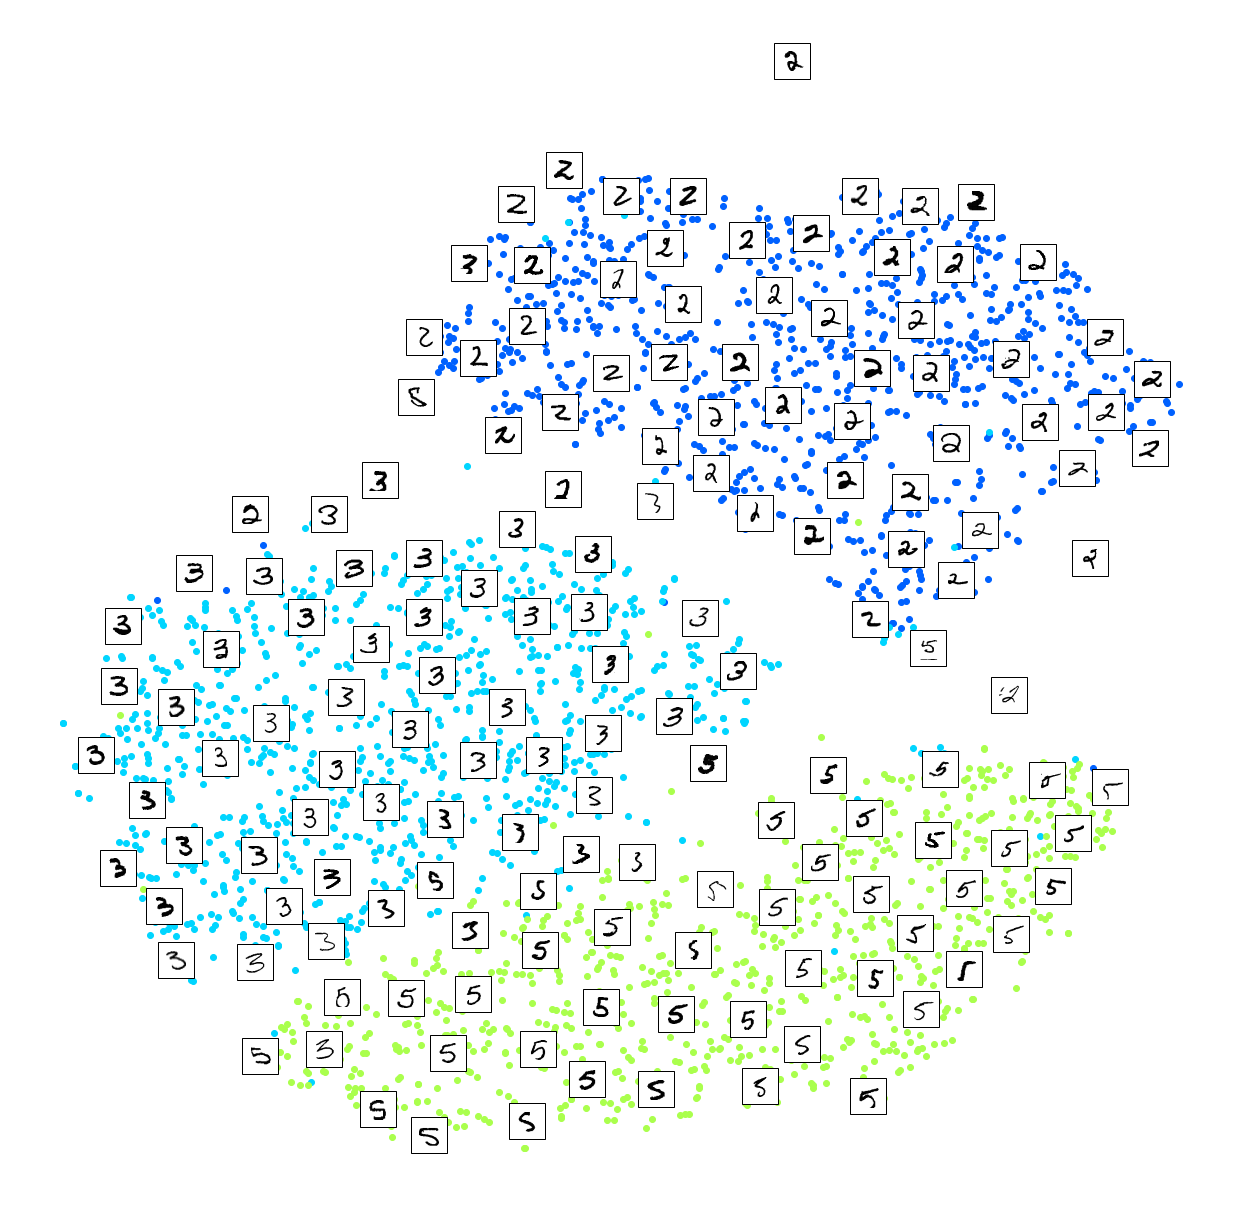

In [35]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

Exercise: Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

Let's start with PCA. We will also time how long it takes:

PCA took 0.2s.


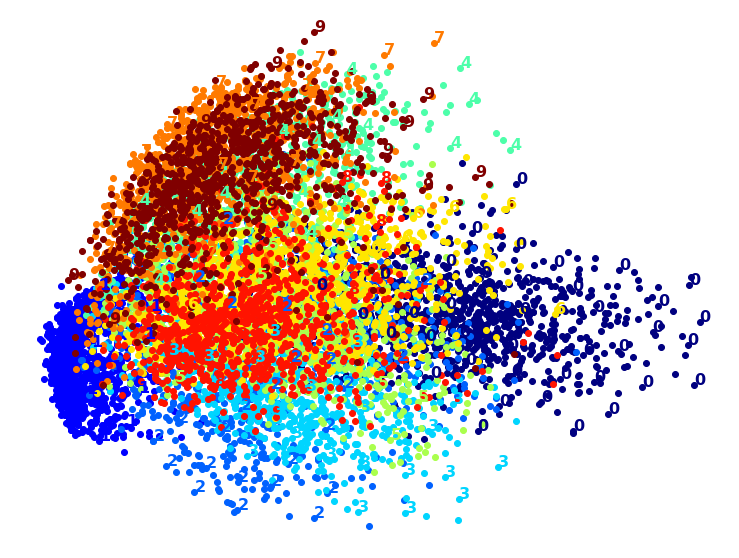

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

t1 = time.time()
X_pca_reduced = pca.fit_transform(X)
t2 = time.time()

print("PCA took {:.1f}s.".format(t2 - t1))
plot_digits(X_pca_reduced, y)
plt.show()

Wow, PCA is blazingly fast! But although we do see a few clusters, there's way too much overlap. Let's try LLE:

LLE took 126.9s.


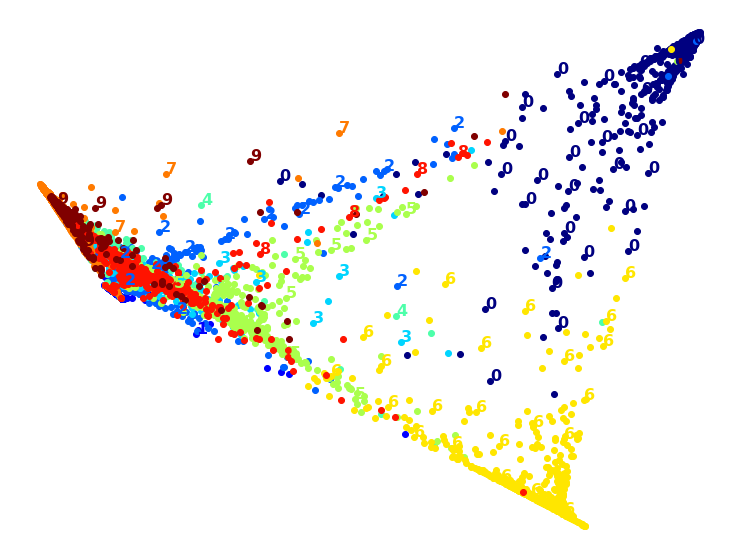

In [40]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)

t1 = time.time()
X_lle_reduced = lle.fit_transform(X)
t2 = time.time()

print("LLE took {:.1f}s.".format(t2 - t1))
plot_digits(X_lle_reduced, y)
plt.show()

That took a while, and the result does not look too good. Let's see what happens if we apply PCA first, preserving 95% of the variance:

PCA+LLE took 36.7s.


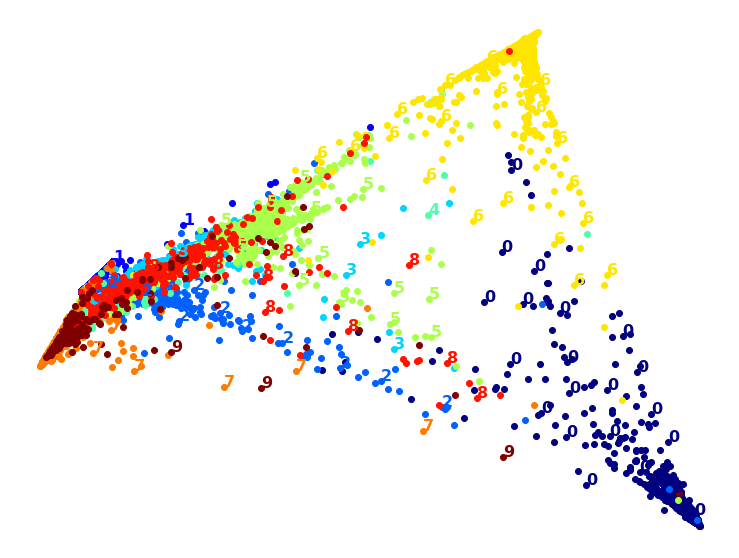

In [41]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])

t1 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t2 = time.time()
print("PCA+LLE took {:.1f}s.".format(t2 - t1))
plot_digits(X_pca_lle_reduced, y)
plt.show()

The result is more or less the same, but this time it was almost 4× faster.

Let's try MDS. It's much too long if we run it on 10,000 instances, so let's just try 2,000 for now:

MDS took 119.6s (on just 2,000 MNIST images instead of 10,000).


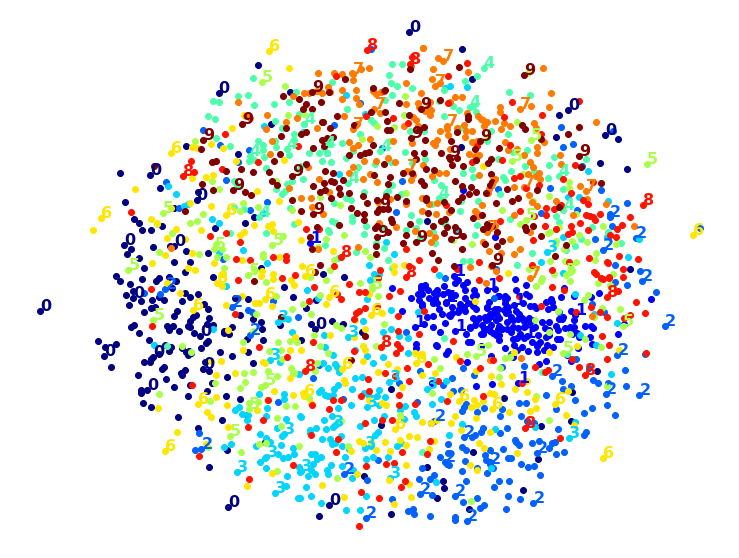

In [43]:
from sklearn.manifold import MDS

m = 2000
mds = MDS(n_components=2)

t1 = time.time()
X_mds_reduced = mds.fit_transform(X[:m])
t2 = time.time()

print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t2 - t1))
plot_digits(X_mds_reduced, y[:m])
plt.show()

This does not look great, all clusters overlap too much. Let's try with PCA first, perhaps it will be faster?

Note that using a Pipeline, we can easily experiment with different possibilities!

PCA+MDS took 121.7s (on 2,000 MNIST images).


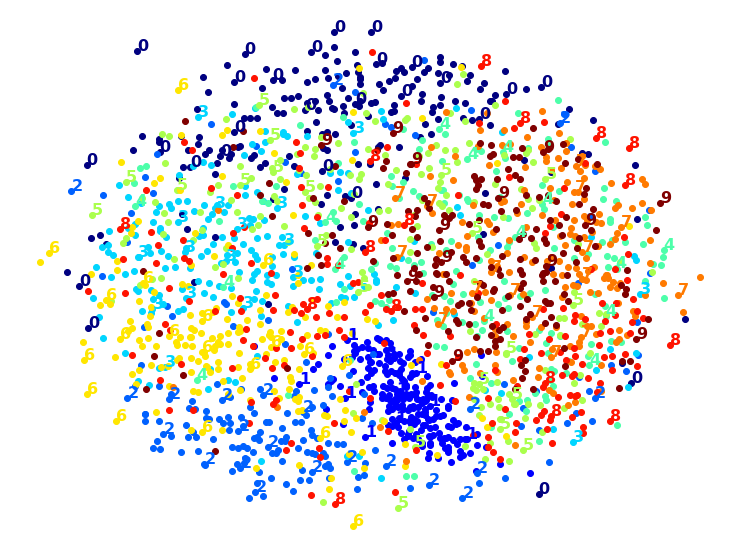

In [44]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t1 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t2 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t2 - t1))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

Pretty much the same thing. PCA didn't help (or hurt).

Let's try LDA:

LDA took 1.8s.


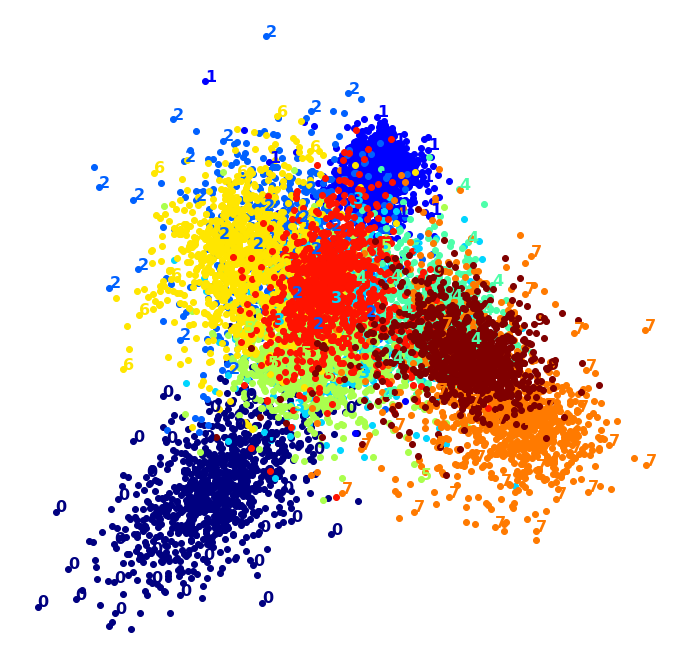

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t1 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t2 = time.time()
print("LDA took {:.1f}s.".format(t2 - t1))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

This one is very fast, and it looks nice at first, until you realize that several clusters overlap severely.

Well, it's pretty clear that t-SNE won this little competition, wouldn't you agree? We did not time it, so let's do that now:

t-SNE took 168.2s.


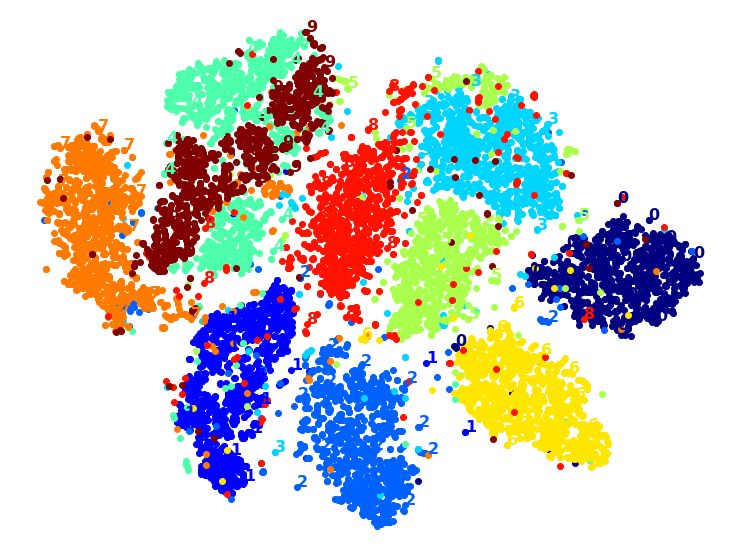

In [46]:
from sklearn.manifold import TSNE

t1 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t2 = time.time()
print("t-SNE took {:.1f}s.".format(t2 - t1))
plot_digits(X_tsne_reduced, y)
plt.show()

It's twice slower than LLE, but still much faster than MDS, and the result looks great. Let's see if a bit of PCA can speed it up:

PCA+t-SNE took 94.8s.


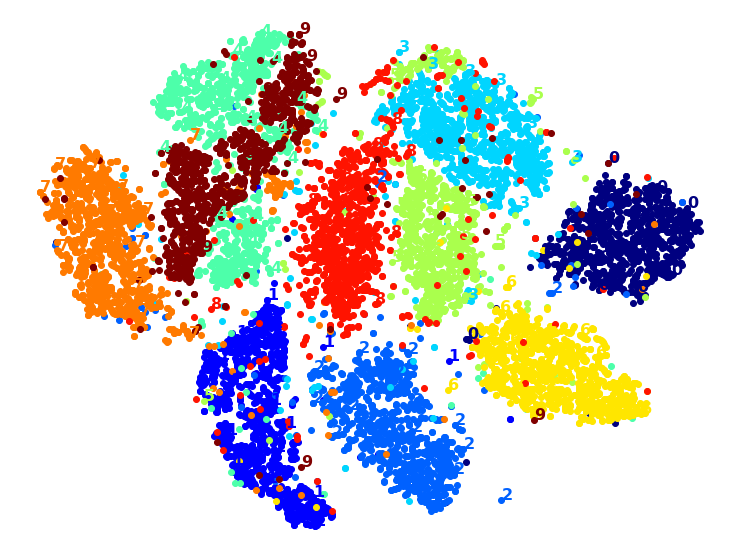

In [47]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t1 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t2 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t2 - t1))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

Yes, PCA roughly gave us a 40% speedup, without damaging the result. We have a winner!